# Fashion MNIST Case Study using Deep Learning

### Context 

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It shares the same image size and structure of training and testing splits like MNIST.


### Data Description

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

0    T-shirt/top

1    Trouser

2    Pullover

3    Dress

4    Coat

5    Sandal

6    Shirt

7    Sneaker

8    Bag

9    Ankle boot

### Objective 

To create a Deep learning model to classify different Fashion MNIST classes.

### Installing tensorflow-gpu

In [1]:
pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 42kB/s 


### Importing Libraries

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt

import cv2
import numpy as np

import random
random.seed(0)

### Loading Dataset

In [59]:
# get the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets\
.fashion_mnist.load_data()
 

The train_images and train_labels arrays are training set - used for model training.

The test_images and test_labels arrays are testing set- used for testing accuracy.

### Labeling class

In [60]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

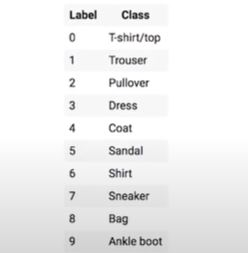

Each image is mapped to single label. 

### Explore the data

Lets explore the data before training the model. The following shows there are 60000 images in the training set , with each image represented as 28x28 Numpy arrays with pixel value ranging from 0 to 255.

In [61]:
train_images.shape

(60000, 28, 28)

Likewise there are 60000 labels in training set

In [62]:
len(train_labels)

60000

In [63]:


train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Each label is an integer between 0 and 9

Lets check Test data

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
len(test_images)

10000

### Preprocess the Data

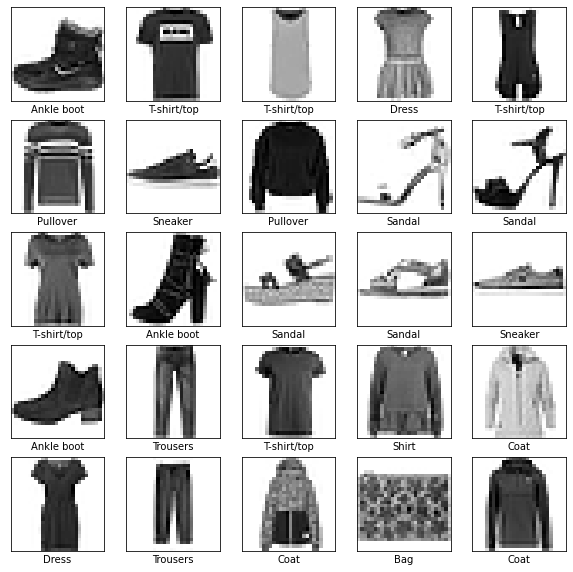

In [64]:
# show 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

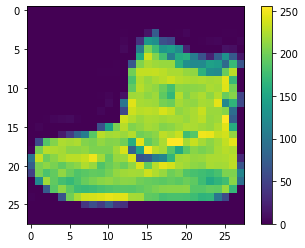

In [65]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

Here we can see this is shoe image and each pixel has values between 0 to 255.

### Scaling the dataset

We can scale values before feeding it to neural networl model. Here we are casting values of training and test dataset from an integer to a float and dividing by 255.

In [66]:
train_images = train_images/255.0
test_images = test_images/255.0

Again checking images after scaling.

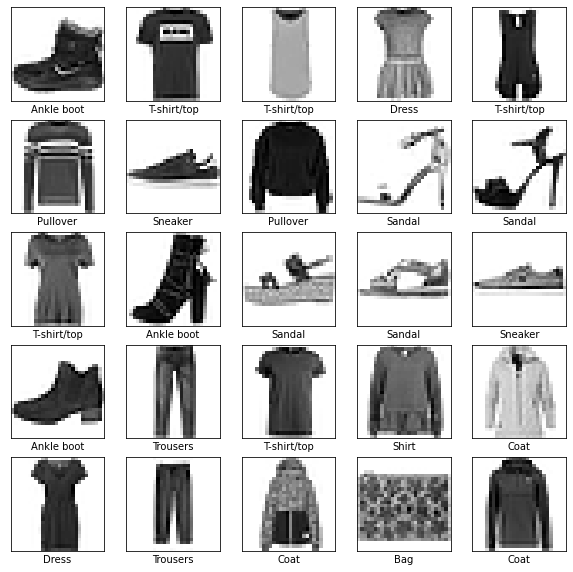

In [67]:
# show 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building the model

In [68]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        ])

The first layer in this neural network is "Flatten" which transforms the format of images from a 2D array (28 x 28 pixels) to 1D array of 28*28= 784 pixels. This layer has no parameters to learn, it only reformat the data.

The second layer is "Dense" layer , this is densly connected or fully connected neural layers. First Dense layer has 128 neurons or nodes. And second Dense layer has 10 neurons with activation function as "Softmax" which returns probability scores that sum to 1. Each node contains a score that indicates the probability of current image belongs to one of 10 digits.

### Compiling the model

In [69]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

Before training a model, we compile it with three parameters : Optimizer, Loss, Metrics.



*   Optimizer : It tells how model is updated based on the data it sees and its 
    loss functions.
*   Loss function : Use to measure how accurate model is during training. Our 
    aim is to minimize the loss.
*   Metrics : Used to monitor the training and test steps with the help of     accuracy measure.






### Training the model

In [85]:
r= model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.8959 - val_loss: 0.3649 - val_accuracy: 0.8664
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9019 - val_loss: 0.3355 - val_accuracy: 0.8770
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9047 - val_loss: 0.3557 - val_accuracy: 0.8794
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2467 - accuracy: 0.9078 - val_loss: 0.3639 - val_accuracy: 0.8777
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2370 - accuracy: 0.9101 - val_loss: 0.3381 - val_accuracy: 0.8831


### Evaluate accuracy on Testdata

In [86]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: ", test_acc)

313/313 - 0s - loss: 0.3381 - accuracy: 0.8831
Test accuracy:  0.8830999732017517


It turns out that accuracy of test data is little less than accuracy of train data.

### Saving the model in .h5 file

In [87]:
model.save("fashion_mnist_model.h5")

### Plotting Graph

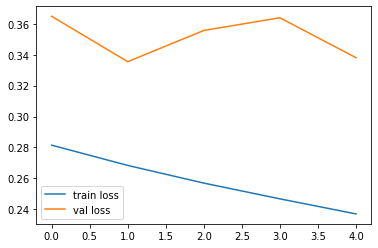

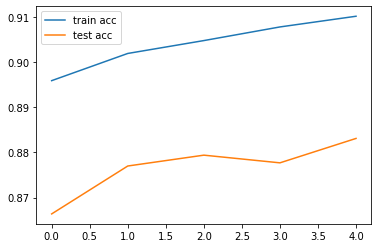

<Figure size 432x288 with 0 Axes>

In [88]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Make predictions

Now we can make prediction for few images.

In [89]:
pred= model.predict(test_images)

In [90]:
pred[0]

array([1.5394575e-06, 1.9718428e-08, 3.1315714e-08, 2.3430285e-08,
       1.1623671e-06, 2.1679823e-03, 4.8579718e-06, 5.0357007e-03,
       2.5105383e-06, 9.9278623e-01], dtype=float32)

Pred is a array of 10 numbers, which describes the probability of each image. But, we will consider the image with highest probability.

In [91]:
np.argmax(pred[2])

1

In [92]:
test_labels[2]

1

We can see that both predicted and test returns result as class 1 which is "Trouser"

#### Take an image from test dataset 

In [93]:
img=test_images[0]
img.shape

(28, 28)

tf.keras.models are optimized to make predictions on a batch or collection of examples at once. So even though we are using a single image we need to add it to a list.

In [94]:
# It will shape in list format because predict needs list.
img= (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [95]:
pred= model.predict(img)
print(pred)

[[1.5394544e-06 1.9718463e-08 3.1315768e-08 2.3430372e-08 1.1623691e-06
  2.1679839e-03 4.8579755e-06 5.0357017e-03 2.5105378e-06 9.9278611e-01]]


In [96]:
pred= pred[0]
np.argmax(pred)

9

In [97]:
test_labels[0]

9

Here we can we predicted and test label values are matching. It means our model predicted correctly.